### Import Statements

In [61]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [62]:
# sample image file
img_file = '../../data/creative_assets/0c1a2c286a6818e1354c2b655f68da09-ffb622dd70303838b356.png'

In [63]:
img = cv2.imread(img_file)

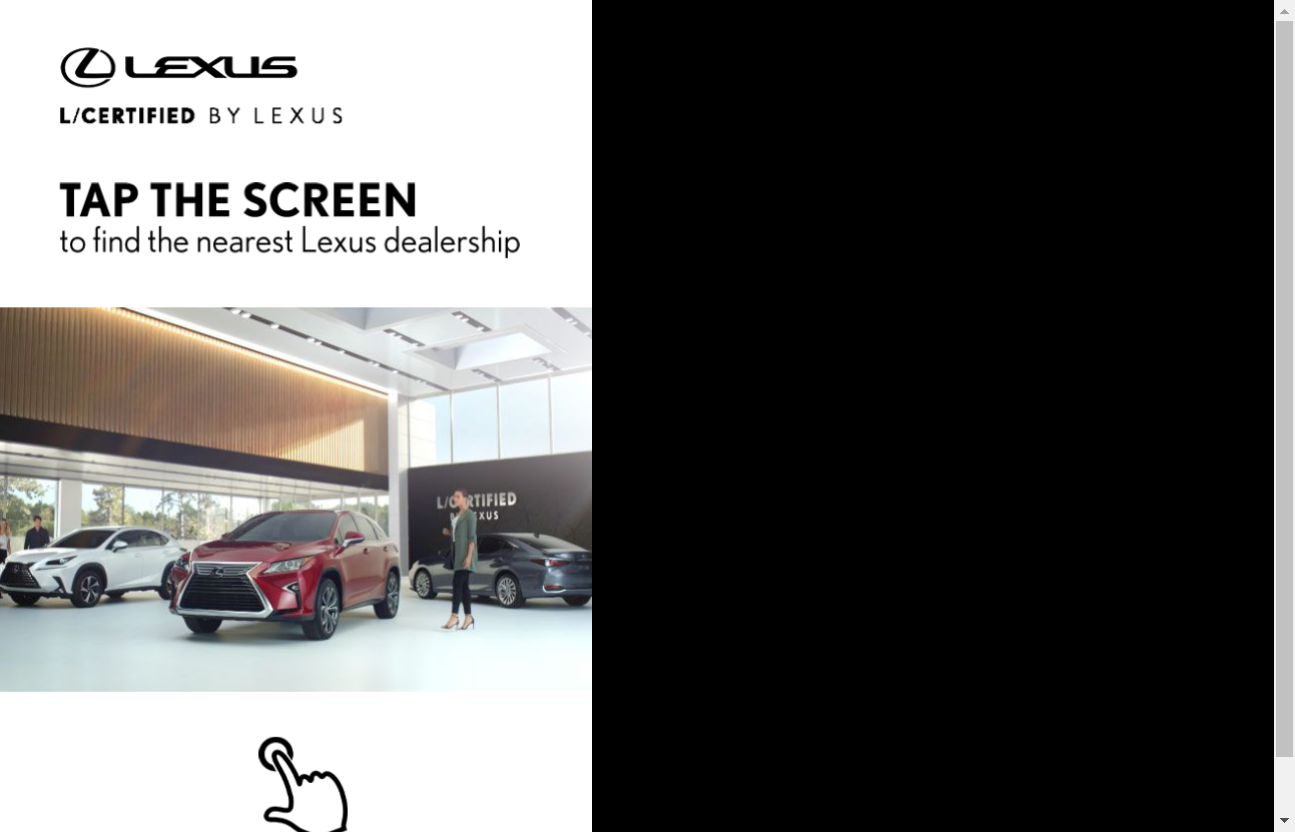

In [64]:
# preview image
img = cv2.imread(img_file)
Image(filename=img_file)

In [65]:
#HSV Based
def detectColorObjects(path_to_img,find_color=None):
    img =cv2.imread(path_to_img)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    if find_color == 'red':
        Red1Lower = np.array([0,90,100])
        Red1Upper = np.array([10,255,255])
        #(170-180)
        Red2Lower = np.array([170,90,100])
        Red2Upper = np.array([180,255,255])
        img_mask1 = cv2.inRange(img_hsv,Red1Lower,Red1Upper)
        img_mask2 = cv2.inRange(img_hsv,Red2Lower,Red2Upper)
        img_mask = img_mask1+img_mask2
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    if find_color == 'green':
        GreenLower = np.array([40,100,100])
        GreenUpper = np.array([80,255,255])
        img_mask = cv2.inRange(img_hsv,GreenLower,GreenUpper)
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    return img,img_mask


def markDetectdObjects(og_img,masked_img):
    # Find Blue Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area):
            x,y,w,h = cv2.boundingRect(contour)
            # FinImg = cv2.rectangle(og_img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(FinImg,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            # BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(100,100))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

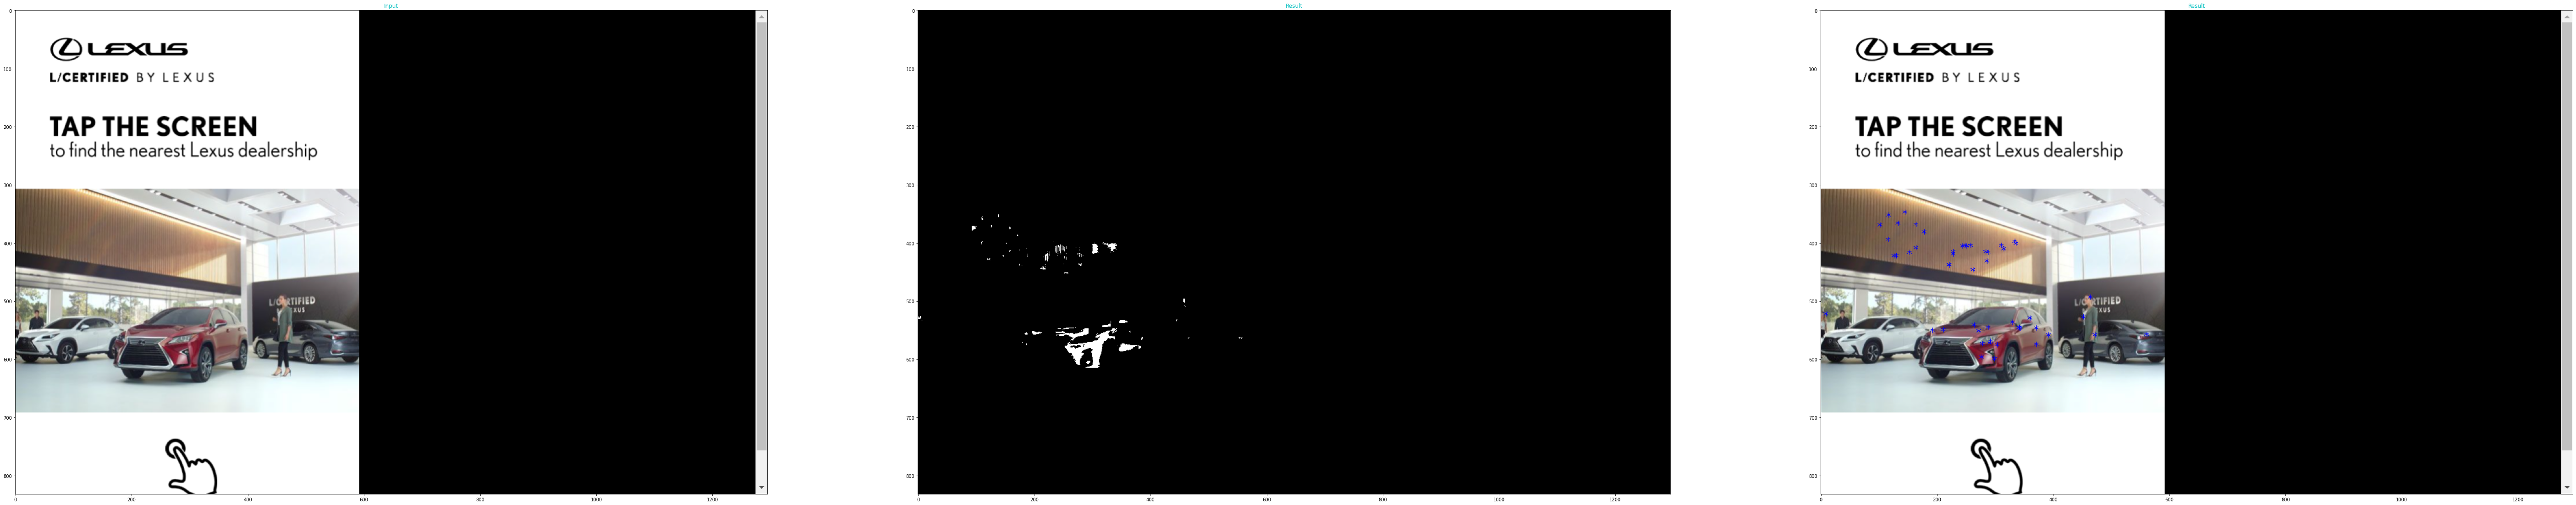

In [66]:
img,maskedImg =detectColorObjects(img_file,find_color='red')
markDetectdObjects(img,maskedImg)